In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Notebook-Extensions" data-toc-modified-id="Notebook-Extensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Extensions</a></span></li><li><span><a href="#Custom-CSS-for-the-notebook" data-toc-modified-id="Custom-CSS-for-the-notebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Custom CSS for the notebook</a></span></li><li><span><a href="#Creating-high-quality-inline-figures" data-toc-modified-id="Creating-high-quality-inline-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating high quality inline figures</a></span></li><li><span><a href="#Styling-Matplotlib-figures" data-toc-modified-id="Styling-Matplotlib-figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Styling Matplotlib figures</a></span></li><li><span><a href="#Styling-how-Pandas-print-cells" data-toc-modified-id="Styling-how-Pandas-print-cells-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Styling how Pandas print cells</a></span></li><li><span><a href="#Auto-reload-files" data-toc-modified-id="Auto-reload-files-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Auto reload files</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
In this notebook I will go through how I have set up the styling and extensions for my Jupyter Notebooks. It should generally improve readability and quality-of-life for the Notebook user. The notebooks will describe the contents of the following files:
1. A `nbextension.config` file which contains a list of all the Notebook Extensions I use. The extension could be enabled using the extension manager, but I lake having it scripted.
1. A  file which contains the default setting for how figures are shown in the notebook. It's called `ipython_config.py` and should be placed in `~/.ipython/profile_default/`. I use it to increase the quality of the figures. 
1. A file that includes the CSS used to render the notebook. It is called  `custom.css` and should be placed in `~/.jupyter/custom/custom.css`. I use this file to set the width and alignment of the different kinds of cells.
1. A file that that changes the default parameters for matplotlib.pyplot. I have called it `my_mpl_style.mplstyle` and it should be placed in  `~/.config/matplotlib/stylelib/`  

Together these file form my customization of my Jupyter notebooks.

# Notebook Extensions
I use the following extensions
1. **ExecuteTime** -- This puts the runtime as well as a timestamp at the end of every cell that has been executed.
1. **autoreload** -- Allows me to have some module automatically reload. Handy when you can to keep some of your function outside the notebook, but still have the convenience of quick editing.
1. **Hinterland** -- Enable code autocompletion menu for every keypress in a code cell, instead of only enabling it with tab.
1. **Highlight selected word** -- As the name suggests it highlights all occurrences of the selected word.
1. **Table of content** -- This allows me include a table of content in the notebook.

I use virtual environments extensively, and I don't want to have to enable these notebook extensions manually each time I start a new project. Can I include these in a config file and simply load that? Luckily the answer is yes.

For example, if we want to install ExecuteTime, we can write.
```bash
jupyter nbextension enable execute_time/ExecuteTime
```

I keep all my preferred notebook extension in `nbextension.config` file and then I use a bash script to enable the extensions.

I have created a shell script that enables all the extensions described in `nbextension.config`, so I can enable every simply by running `sh install_nbextensions.sh`.

# Custom CSS for the notebook
I love Jupyter Notebook, but there are some things about the default styling of the cells that I don't like, e.g. the figures are left-centered and the text fields are too wide. So I was quite happy to learn that Jupyter will use the following file if it exists: `~/.jupyter/custom/custom.css`.

    % The cell was generated using: "%load /Users/hartmann/.jupyter/custom/custom.css" 
```css
@import url("https://fonts.googleapis.com/css?family=Muli");

body {
  font-family: "Muli", sans-serif;
}

img {
  display: block;
  margin: auto;
}

div.output_area .rendered_html img {
  margin-left: auto;
  margin-right: auto;
}

h1 {
  text-align: left;
}

h2 {
  text-align: left;
}

h3 {
  text-align: left;
}

canvas {
  display: block;
  margin: auto;
}

.container {
  width: 50% !important;
  min-width: 750px;
}

div.cell.selected {
  border-left-width: 1px !important;
}

div.text_cell_render {
  width: 70%;
  text-align: justify;
  margin: 0 auto;
}

div.output_scroll {
  resize: vertical !important;
}

/* Remove the toolbar that result from using  matplotlib notebook magic*/
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
```

# Creating high quality inline figures

I often save figures by drag-and-drop rather than running `fig.savefig()`. However, if you do that you will not get the benefits of the 

One can change the default setting for iPython. Running `ipython profile create` one can creates the file `~/.ipython/profile_default/ipython_config.py` that contains all the configs, see [this](https://gist.github.com/minrk/3301035). By adding `c.InlineBackend.figure_format = 'retina'` to the file, the resolution of the inline figures is improved greatly. This also means that the figures will have the same resolution if you save them by dragging.


# Styling Matplotlib figures
Below I define a function that creates a figure and returns the figure object so I can save the figure. I want to be able to compare the figures as I change the styling.

In [2]:
n_curves = 4
random_data = np.random.rand(100,n_curves)
sorted_data = [sorted(random_data[:,i]) for i in range(n_curves)]
def create_figure(sorted_data, fig_name):
    fig, ax = plt.subplots()
    for y in sorted_data: 
        ax.plot(y, label='label');
    ax.set_title("Title")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.legend()
    fig.tight_layout()
    fig.savefig('../figs/'+fig_name)
    return fig

First I create the plain figure using the default styling that comes with MatplotLib.

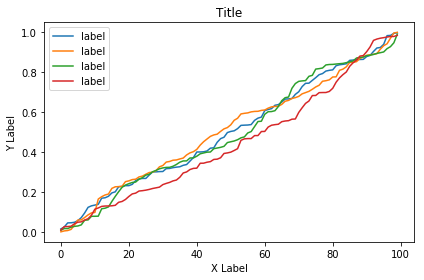

In [3]:
fig = create_figure(sorted_data, 'plain')

We want out figures to have a print quality, so we will set the figure format to retina. This should make the figure look a lot sharper.

We can alter the default parameters used by matplotlib by changing the values in the `plt.rcParams` dictionary.

Lets have a look at the five first keys in the dictionary:

In [4]:
[key for key in plt.rcParams.keys()][:5]

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate']

Below I will change some of the styling:

In [5]:
# %load matplotlib_config.py
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False

I then change the file and run it again below:

Lets plot the figure again now that the defaults have ben changed.

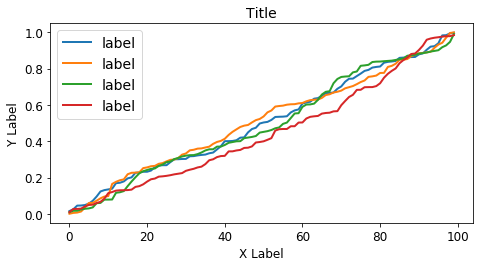

In [6]:
fig = create_figure(sorted_data, 'new_default_parameters')

Instead of including all the code above in every notebook one can write a style sheets as explained [here](https://matplotlib.org/users/style_sheets.html). I keep my own custom style sheet as a Python Module on GitHub so I can install it using `pip`. However, the direct manipulation shown above is extremely useful when developing your custom styling.

Lets see an example of a plot that uses the custom style defined in `my_mpl_style.mplstyle`. It should be placed in `~/.connfig/matplotlib/stylelib/`.

In [7]:
matplotlib.get_configdir()

'/Users/hartmann/.matplotlib'

In [8]:
matplotlib.matplotlib_fname()

'/Users/hartmann/.matplotlib/matplotlibrc'

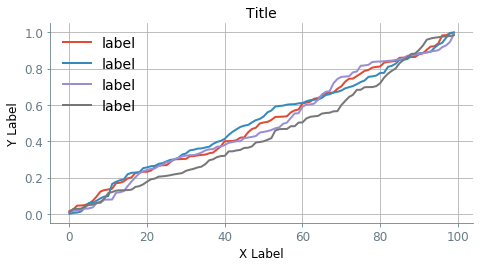

In [18]:
plt.style.use('my_mpl_style')
plt.rcParams['axes.grid'] = True
fig = create_figure(sorted_data, 'using_mpl_style')

# Styling how Pandas print cells

In [10]:
df = pd.DataFrame(np.random.rand(100,10))

In [11]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.174181,0.883550,0.298616,0.706696,0.399087,0.869848,0.712560,0.966778,0.938741,0.334535
1,0.486797,0.058113,0.132710,0.392684,0.253301,0.424026,0.085891,0.553317,0.466875,0.976373
2,0.198654,0.692880,0.253548,0.918403,0.447008,0.952147,0.965895,0.109424,0.279736,0.207744
3,0.091654,0.258421,0.620809,0.356563,0.751852,0.625322,0.791099,0.371022,0.739031,0.302551
4,0.570583,0.254322,0.912169,0.476734,0.832397,0.118598,0.949895,0.045394,0.975556,0.293385
5,0.434815,0.924450,0.619897,0.376578,0.966480,0.601265,0.111596,0.904333,0.162341,0.002610
6,0.155679,0.560548,0.523205,0.449049,0.237392,0.036631,0.809839,0.276206,0.668129,0.964622
7,0.050855,0.588367,0.248848,0.034255,0.415074,0.627399,0.904471,0.270857,0.778428,0.771436
8,0.994795,0.146508,0.027472,0.167796,0.041747,0.476093,0.317742,0.623852,0.964624,0.934729
9,0.234086,0.437859,0.896490,0.259877,0.257108,0.440356,0.168466,0.383810,0.361375,0.767454


In [12]:
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 9001)


In [13]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.174181,0.883550,0.298616,0.706696,0.399087,0.869848,0.712560,0.966778,0.938741,0.334535
1,0.486797,0.058113,0.132710,0.392684,0.253301,0.424026,0.085891,0.553317,0.466875,0.976373
2,0.198654,0.692880,0.253548,0.918403,0.447008,0.952147,0.965895,0.109424,0.279736,0.207744
3,0.091654,0.258421,0.620809,0.356563,0.751852,0.625322,0.791099,0.371022,0.739031,0.302551
4,0.570583,0.254322,0.912169,0.476734,0.832397,0.118598,0.949895,0.045394,0.975556,0.293385
5,0.434815,0.924450,0.619897,0.376578,0.966480,0.601265,0.111596,0.904333,0.162341,0.002610
6,0.155679,0.560548,0.523205,0.449049,0.237392,0.036631,0.809839,0.276206,0.668129,0.964622
7,0.050855,0.588367,0.248848,0.034255,0.415074,0.627399,0.904471,0.270857,0.778428,0.771436
8,0.994795,0.146508,0.027472,0.167796,0.041747,0.476093,0.317742,0.623852,0.964624,0.934729
9,0.234086,0.437859,0.896490,0.259877,0.257108,0.440356,0.168466,0.383810,0.361375,0.767454


# Auto reload files
Often I will be developing a python module while I'm writing the notebook. I will typically put functions for plotting or some pre-processing inside such a file. But this means that if I want to change I will have to manually reload the file. However, using the `autoreload` Notebook extension, I no longer have to worry about that

In [14]:
%load_ext autoreload
%autoreload 2
%aimport helperFunctions

In [15]:
helperFunctions.some_function()

Printing something.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.


I then change the file and run it again below:

In [16]:
with open("helperFunctions.py","a+") as f:
    f.write("\n    print('Now it is printing some more.')")
f.close()

Lets run it again.

In [17]:
helperFunctions.some_function()

Printing something.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.
Now it is printing some more.


Cool, right?

# Conclusion
I have shown how you customize you jupyter notebook by using three different config files and a CSS file. I hope you found it useful.

# References
I have found the following references useful when developing my customization.
1. [Gerrit Gruben - Leveling up your Jupyter notebook skills](https://www.youtube.com/watch?v=b8g-8T0amuk&t=335s)